In [ ]:
import pandas as pd
import glob as glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
## HERE WE LOAD OUR DATA AND WE REMOVE SOME OBVIOUS ERRORS, INTRODUCE OUR SCORING SYSTEM AND CREATE OUR FINAL_DF
## AND TOP30STOCKS BASED ON THE SCORE VARIABLE.
dir='C:\\Users\\Naethiell\\Desktop\\Μεταπτυχιακό\\ML\\HW1\\Stocks'
files = glob.glob(dir + '/*.txt')

big_df=pd.DataFrame(columns = ['Name', 'Start' , 'End' , 'Days Traded', 'MeanVolume' ,'Score'])
stocks=[]

i=0

for file in files:
    try:
        df = pd.read_csv(file)
        Name=file.split('\\')[-1].split('.')[0]
        Score=round((((df['High']-df['Low'])*df['Volume']).mean()),1)
        df['Score']=Score
        df['Name']=Name
        df= df[(df['Open'] > 0) & (df['High'] > 0) & (df['Low'] > 0) & (df['Close'] > 0) & (df['Volume'] > 0)]

        new_row = {
            'Name': Name,
            'Start': df['Date'].iloc[0],
            'End': df['Date'].iloc[-1],
            'Days Traded': len(df['Date']),
            'MeanVolume' : round(df['Volume'].mean(),1),
            'Score': Score}
        stocks.append((Name,df))
        big_df.loc[i] = new_row
        i+=1

    except:
        print("")

big_df=big_df[big_df['Days Traded']>100]
big_df_sorted = big_df.sort_values('Score',ascending=False)
top30stocks_score=big_df.sort_values('Score',ascending=False)[:30]

final_df=[]
for Name,df in stocks:
  if Name in top30stocks_score.values:
    final_df.append(df)

final_df=pd.concat(final_df)
final_df=final_df.sort_values(['Date','Score'],ascending=[True,False])
final_df=final_df.drop_duplicates(subset='Date')


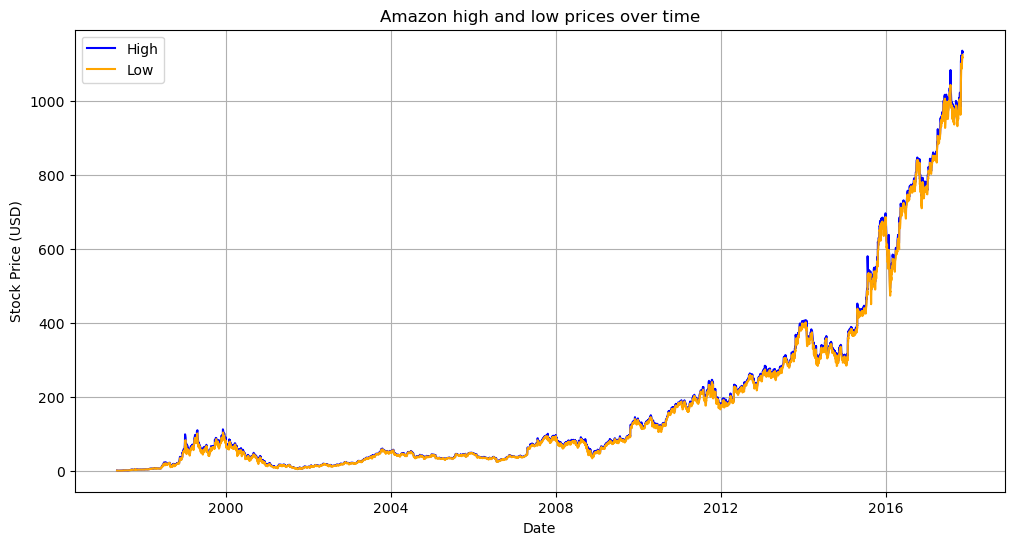

143574114288
13601


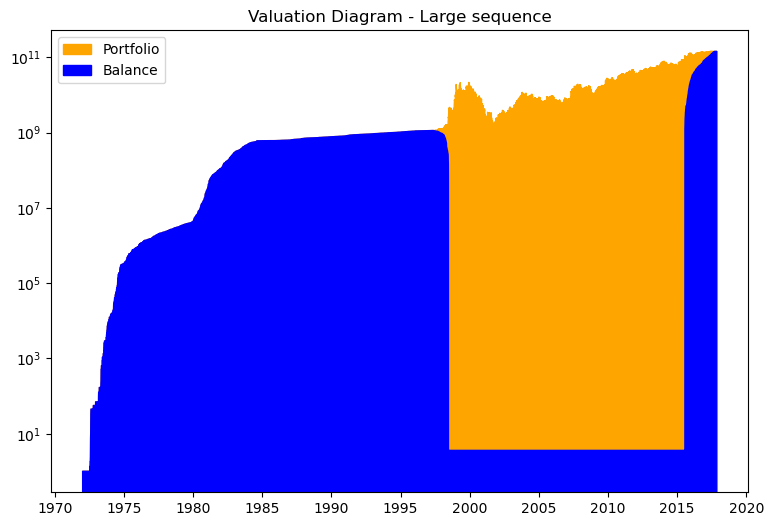

In [ ]:
###BIG SEQUENCE

current_day=[]
daily_balance=[]
daily_portofolio=[]

amazon_file='C:\\Users\\Naethiell\\Desktop\\Μεταπτυχιακό\\ML\\HW1\\Stocks\\amzn.us.txt'
amazon_df = pd.read_csv(amazon_file, parse_dates=['Date'])

plt.figure(figsize=(12, 6))
plt.plot(amazon_df['Date'], amazon_df['High'], label='High', color='blue')
plt.plot(amazon_df['Date'], amazon_df['Low'], label='Low', color='orange')

plt.title('Amazon high and low prices over time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

##AMAZON DATE
final_df['Date'] = pd.to_datetime(final_df['Date'])
cutoff_date = pd.to_datetime('1997-05-16')
final_df = final_df[final_df['Date'] < cutoff_date]
final_df['Date'] = final_df['Date'].dt.strftime('%Y-%m-%d')
amazon_df['Date'] = amazon_df['Date'].dt.strftime('%Y-%m-%d')

limit=1000000
transaction=[]
money=1
count=0

##INTRADAY TRADING UNTIL AMAZON DATE
for index, row in final_df.iterrows():

    if count>limit:
      break

    val1=row['High']-row['Open']
    val2=row['Close']-row['Low']

    if val1>=val2:
      amount=int(min(0.1*row['Volume'],money//row['Open']))
      if amount==0:
        continue
      money-=amount*row['Open']
      transaction.append((row['Date'],'buy-open',row['Name'],amount))
      transaction.append((row['Date'],'sell-high',row['Name'],amount))
      money_made=amount*row['High']
      money+=money_made
      count+=2

      current_day.append(row['Date'])
      daily_balance.append(money)
      daily_portofolio.append(0)

    if val1<val2:
      amount=int(min(0.1*row['Volume'],money//row['Low']))
      if amount==0:
        continue
      money-=amount*row['Low']
      transaction.append((row['Date'],'buy-low',row['Name'],amount))
      transaction.append((row['Date'],'sell-close',row['Name'],amount))
      money_made=amount*row['Close']
      money+=money_made
      count+=2

      current_day.append(row['Date'])
      daily_balance.append(money)
      daily_portofolio.append(0)

##NOW WE BUY AMAZON STOCK UNTIL WE RUN OUT OF MONEY
amazon_stock=0

for index, row in amazon_df.iterrows():
    if row['Low']<40:
        amount=int(min(money//row['Low'],0.1*row['Volume']))
        amazon_stock+=amount
        if amount!=0:
            transaction.append((row['Date'],'buy-low','amzn',amount))
            count+=1
        money-=amount*row['Low']

        current_day.append(row['Date'])
        daily_balance.append(money)
        daily_portofolio.append((amazon_stock)*row['High'])


    if row['High']>520:
        sold_amount_for_day=int(min(amazon_stock,0.1*row['Volume']))
        amazon_stock-=sold_amount_for_day
        if sold_amount_for_day!=0:
            transaction.append((row['Date'],'sell-high','amzn',sold_amount_for_day))
            count+=1
        money+=sold_amount_for_day*row['High']

    current_day.append(row['Date'])
    daily_balance.append(money)
    daily_portofolio.append((amazon_stock)*row['High'])

print(int(money))
print(len(transaction))


##CREATE TRANSACTIONS FILE FOR BIG SEQUENCE
txt_file_path = 'transaction_big.txt'
with open(txt_file_path, 'w') as file:
    file.write(f"{len(transaction)}\n")
with open(txt_file_path, 'a') as file:
    for transaction in transaction:
        file.write(f"{transaction[0]} {transaction[1]} {transaction[2]} {transaction[3]}\n")


##VALUATION DIAGRAM
data = {'Date': current_day, 'Balance': daily_balance, 'Portfolio': daily_portofolio}
large_df = pd.DataFrame(data)
large_df['Total Value'] = large_df['Balance'] + large_df['Portfolio']
large_df['Date']= pd.to_datetime(large_df['Date'])
large_df.sort_values(['Date'], ascending = [True])
large_df

plt.rcParams["figure.figsize"] = (9,6)
plt.fill_between(large_df['Date'], large_df['Total Value'] ,label='Portfolio',color='orange')
plt.fill_between(large_df['Date'], large_df['Balance'] ,label='Balance',color='blue')
plt.title('Valuation Diagram - Large sequence') #
plt.yscale('log')
plt.legend(loc='upper left')

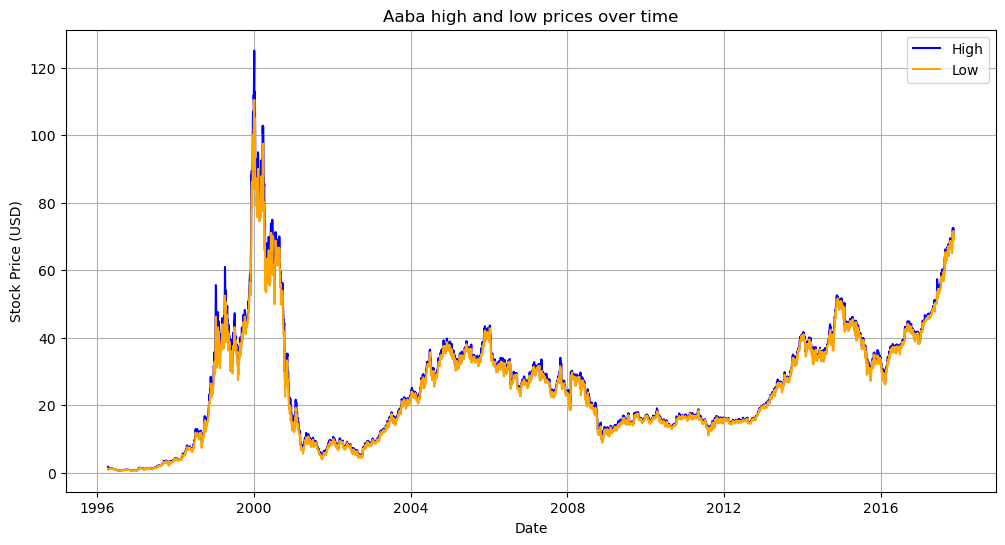

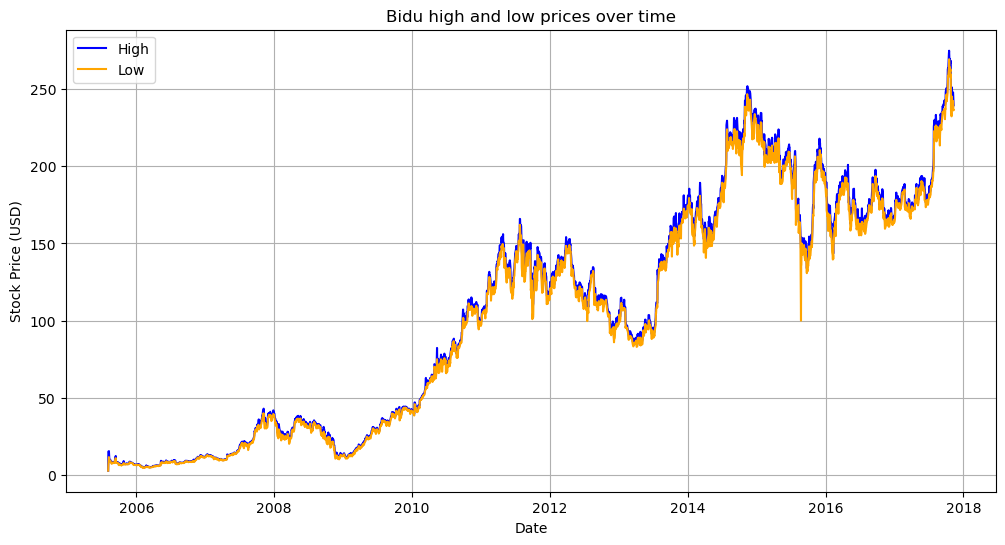

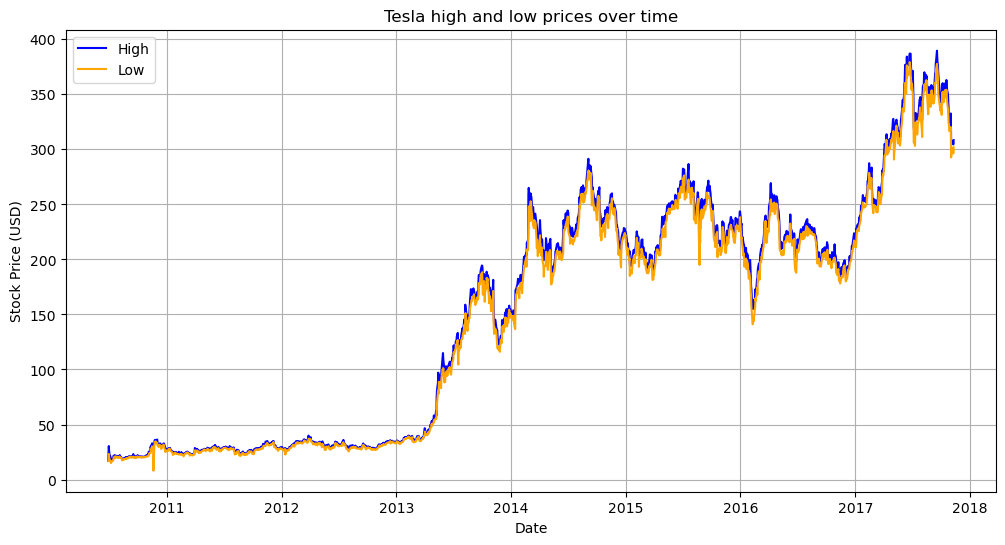

635246421.8926201
992


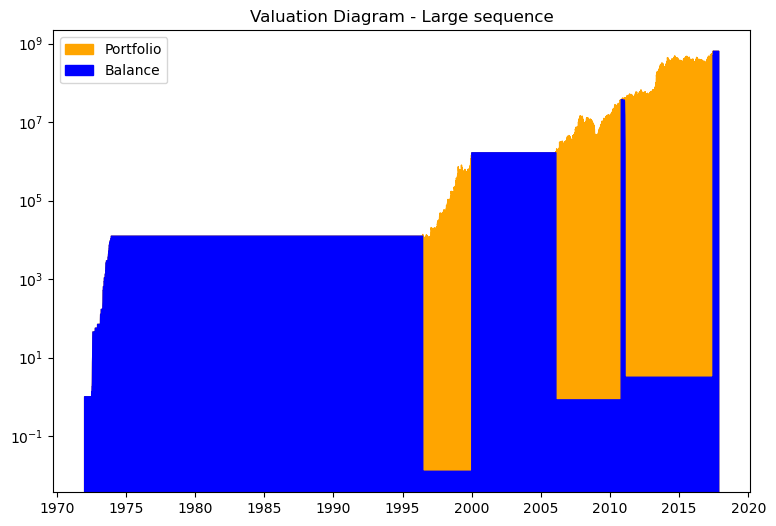

In [ ]:
# SMALL SEQUENCE



##CREATE AABA_DF AND TIME SERIES. WE RESTRAIN THE AABA_DF UNTIL 30-1-2001 SINCE BY THEN ALL OUR TRADING USING THIS
##STOCK WILL BE OVER
aaba_file = 'C:\\Users\\Naethiell\\Desktop\\Μεταπτυχιακό\\ML\\HW1\\Stocks\\aaba.us.txt'
aaba_df = pd.read_csv(aaba_file, parse_dates=['Date'])


plt.figure(figsize=(12, 6))
plt.plot(aaba_df['Date'], aaba_df['High'], label='High', color='blue')
plt.plot(aaba_df['Date'], aaba_df['Low'], label='Low', color='orange')

plt.title('Aaba high and low prices over time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)


aaba_df['Date'] = pd.to_datetime(aaba_df['Date'])
cutoff_date = pd.to_datetime('2001-01-30')
aaba_df = aaba_df[aaba_df['Date'] < cutoff_date]
aaba_df['Date'] = aaba_df['Date'].dt.strftime('%Y-%m-%d')


## EDITING FINAL_DF TO CONTAIN DATA ONLY UNTIL AABA STOCK APPERS
final_df['Date'] = pd.to_datetime(final_df['Date'])
cutoff_date = pd.to_datetime('1996-04-12')
final_df = final_df[final_df['Date'] < cutoff_date]
final_df['Date'] = final_df['Date'].dt.strftime('%Y-%m-%d')

##INTRADAY TRADING UNTIL AABA STOCK APPERS
limit=970
transaction=[]
money=1
count=0

current_day=[]
daily_balance=[]
daily_portofolio=[]
for index, row in final_df.iterrows():

    if count>limit:
      break

    val1=row['High']-row['Open']
    val2=row['Close']-row['Low']

    if val1>=val2:
      amount=int(min(0.1*row['Volume'],money//row['Open']))
      if amount==0:
        continue
      money-=amount*row['Open']
      transaction.append((row['Date'],'buy-open',row['Name'],amount))
      transaction.append((row['Date'],'sell-high',row['Name'],amount))
      money_made=amount*row['High']
      money+=money_made
      count+=2

      current_day.append(row['Date'])
      daily_balance.append(money)
      daily_portofolio.append(0)

    if val1<val2:
      amount=int(min(0.1*row['Volume'],money//row['Low']))
      if amount==0:
        continue
      money-=amount*row['Low']
      transaction.append((row['Date'],'buy-low',row['Name'],amount))
      transaction.append((row['Date'],'sell-close',row['Name'],amount))
      money_made=amount*row['Close']
      money+=money_made
      count+=2

      current_day.append(row['Date'])
      daily_balance.append(money)
      daily_portofolio.append(0)






##NOW WE BUY AABA STOCK UNTIL WE RUN OUT OF MONEY AND THEN SELL AT HIGH PRICE
aaba_stock = 0
for index, row in aaba_df.iterrows():
    if row['Low'] < 1:
        amount = int(min(money // row['Low'], 0.1 * row['Volume']))
        aaba_stock += amount
        if amount != 0:
            transaction.append((row['Date'], 'buy-low', 'aaba', amount))
            count += 1
        money -= amount * row['Low']




    if row['High'] > 120:
        sold_amount_for_day = int(min(aaba_stock, 0.1 * row['Volume']))
        aaba_stock -= sold_amount_for_day
        if sold_amount_for_day != 0:
            transaction.append((row['Date'], 'sell-high', 'aaba', sold_amount_for_day))
            count += 1
        money += sold_amount_for_day * row['High']

    current_day.append(row['Date'])
    daily_balance.append(money)
    daily_portofolio.append((aaba_stock)*row['High'])



##NOW WE MOVE ON TO BIDU STOCK, AGAIN WE CREATE BIDU_DF AND TIME SERIES. WE RESTRAIN BIDU DF TO CONTAIN DATES ONLY
##UNTIL TESLA STOCK APPERS
bidu_file='C:\\Users\\Naethiell\\Desktop\\Μεταπτυχιακό\\ML\\HW1\\Stocks\\bidu.us.txt'
bidu_df=pd.read_csv(bidu_file,parse_dates=['Date'])


plt.figure(figsize=(12, 6))
plt.plot(bidu_df['Date'], bidu_df['High'], label='High', color='blue')
plt.plot(bidu_df['Date'], bidu_df['Low'], label='Low', color='orange')

plt.title('Bidu high and low prices over time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)


bidu_df['Date'] = pd.to_datetime(bidu_df['Date'])
cutoff_date = pd.to_datetime('2010-11-19')
bidu_df =bidu_df[bidu_df['Date'] < cutoff_date]
bidu_df['Date'] = bidu_df['Date'].dt.strftime('%Y-%m-%d')
bidu_df.sort_values('Low',ascending=True)

##NOW WE BUY BIDU STOCK UNTIL WE RUN OUT OF MONEY AND THEN SELL AT HIGH PRICE
bidu_stock=0

for index, row in bidu_df.iterrows():
        if row['Low']<5:
            amount=int(min(money//row['Low'],0.1*row['Volume']))
            bidu_stock+=amount
            if amount!=0:
                transaction.append((row['Date'],'buy-low','bidu',amount))
                count+=1
            money-=amount*row['Low']


        if row['High']>=110:
            sold_amount_for_day=int(min(bidu_stock,0.1*row['Volume']))
            bidu_stock-=sold_amount_for_day
            if sold_amount_for_day!=0:
                transaction.append((row['Date'],'sell-high','bidu',sold_amount_for_day))
                count+=1
            money+=sold_amount_for_day*row['High']

        current_day.append(row['Date'])
        daily_balance.append(money)
        daily_portofolio.append((bidu_stock)*row['High'])


##NOW WE MOVE ON TO OUR FINAL STOCK, TESLA.
tsla_file = 'C:\\Users\\Naethiell\\Desktop\\Μεταπτυχιακό\\ML\\HW1\\Stocks\\tsla.us.txt'
tsla_df = pd.read_csv(tsla_file,parse_dates=['Date'])


plt.figure(figsize=(12, 6))
plt.plot(tsla_df['Date'], tsla_df['High'], label='High', color='blue')
plt.plot(tsla_df['Date'], tsla_df['Low'], label='Low', color='orange')

plt.title('Tesla high and low prices over time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
cutoff_date = pd.to_datetime('2010-11-19')
tsla_df = tsla_df[tsla_df['Date'] >= cutoff_date]
tsla_df['Date'] = tsla_df['Date'].dt.strftime('%Y-%m-%d')

##BUY TESLA IN BULK AND SELL AT HIGH PRICE
tsla_stock = 0

for index, row in tsla_df.iterrows():

        if row['Low'] < 25:
            amount = int(min(money // row['Low'], 0.1 * row['Volume']))
            tsla_stock += amount
            if amount != 0:
                transaction.append((row['Date'], 'buy-low', 'tsla', amount))
                count += 1
            money -= amount * row['Low']


        if row['High'] >= 380:
            sold_amount_for_day = int(min(tsla_stock, 0.1 * row['Volume']))
            tsla_stock -= sold_amount_for_day
            if sold_amount_for_day != 0:
                transaction.append((row['Date'], 'sell-high', 'tsla', sold_amount_for_day))
                count += 1
            money += sold_amount_for_day * row['High']

        current_day.append(row['Date'])
        daily_balance.append(money)
        daily_portofolio.append((tsla_stock)*row['High'])

##FINAL BALANCE AND NUMBER OF TRANSACTION
print(money)
print(len(transaction))

data = {'Date': current_day, 'Balance': daily_balance, 'Portfolio': daily_portofolio}
large_df = pd.DataFrame(data)
large_df['Total Value'] = large_df['Balance'] + large_df['Portfolio']
large_df['Date']= pd.to_datetime(large_df['Date'])
large_df.sort_values(['Date'], ascending = [True])
large_df

plt.rcParams["figure.figsize"] = (9,6)
plt.fill_between(large_df['Date'], large_df['Total Value'] ,label='Portfolio',color='orange')
plt.fill_between(large_df['Date'], large_df['Balance'] ,label='Balance',color='blue')
plt.title('Valuation Diagram - Large sequence') #
plt.yscale('log')
plt.legend(loc='upper left')

txt_file_path = 'transaction_small.txt'
with open(txt_file_path, 'w') as file:
    file.write(f"{len(transaction)}\n")
with open(txt_file_path, 'a') as file:
    for transaction in transaction:
        file.write(f"{transaction[0]} {transaction[1]} {transaction[2]} {transaction[3]}\n")

